### visualise

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

In [4]:
from compare_paincontrol import fit_bp, make_data_paincontrol
from compare_hyperparams import load_feats, feature_importance, load_modZ
from compare_bfl_qsidp import load_qscode, match_question

In [66]:
def load_cv(cv_dir, qtype='all'):
    """load cv results"""
    cv_ls = []

    if qtype=='idp':
        end_name = 'idp.csv'
    elif qtype=='qs':
        end_name = 'qs.csv'
    else:
        end_name = '.csv'
        
    for f in os.listdir(cv_dir):
        if f.endswith(end_name):	
            tmp = pd.read_csv(os.path.join(cv_dir, f))
            cv_ls.append(tmp)
    df = pd.concat(cv_ls)
    print(df.head())
    return df

In [49]:
curr_dir = '/well/seymour/users/uhu195/python/extract_npy'
cv_dir = os.path.join(curr_dir, 'cv_results', 'paincontrol')

In [50]:
df = load_cv(cv_dir)

   fit_time  score_time  test_accuracy   test_f1  test_roc_auc  bestIC  \
0  4.080559    0.097763       0.540825  0.528404      0.540080      30   
1  4.072495    0.067493       0.532046  0.540913      0.541698      30   
2  4.055430    0.067314       0.539947  0.527076      0.545512      30   
3  4.073637    0.068237       0.471466  0.505747      0.458573      30   
4  2.708713    0.068676       0.529412  0.516245      0.534342      30   

           qsidp  
0           None  
1           None  
2           None  
3           None  
4  ['cognitive']  


In [51]:
# df_g = df.groupby(['bestIC', 'qsidp'])['test_roc_auc_ovo', 'test_accuracy'].mean().rename(columns={'test_roc_auc_ovo':'auc', 'test_accuracy':'acc'})
df_g = df.groupby(['bestIC', 'qsidp'])['test_roc_auc', 'test_accuracy'].mean().rename(columns={'test_roc_auc':'auc', 'test_accuracy':'acc'})

/gpfs3/well/seymour/users/uhu195/python/extract-py3.7.4-skylake/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [52]:
df_g.iloc[df_g['auc'].argmax()]

auc    0.680659
acc    0.636084
Name: (200, ['lifestyle', 'mental']), dtype: float64

In [53]:
df_g.iloc[df_g['acc'].argmax()]

auc    0.673607
acc    0.639157
Name: (30, ['cognitive', 'lifestyle', 'mental']), dtype: float64

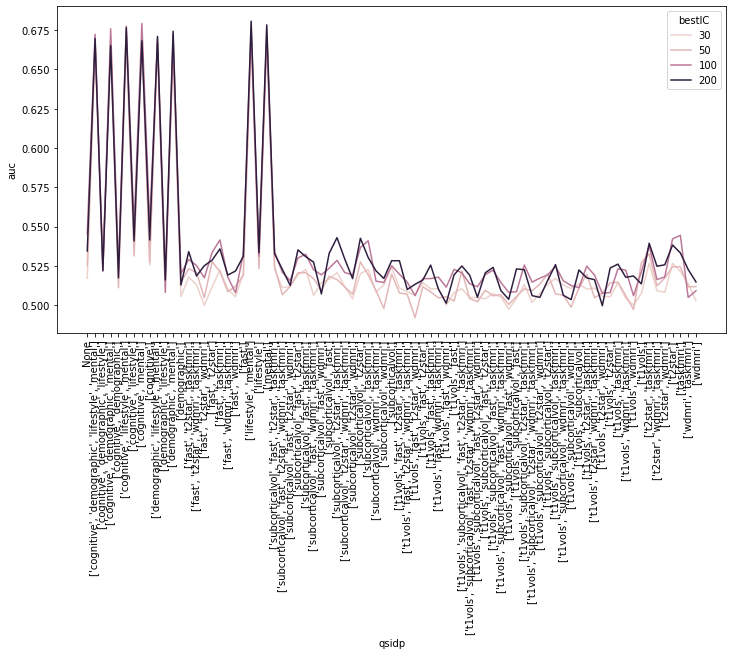

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
_ = sns.lineplot(data=df_g, x='qsidp', y='auc', hue='bestIC', ax=ax)
_ = plt.xticks(rotation=90)

In [67]:
df_idp = load_cv(cv_dir, qtype='idp')

   fit_time  score_time  test_accuracy   test_f1  test_roc_auc  bestIC  \
0  0.911770    0.059494       0.510975  0.502234      0.530481      30   
1  0.917140    0.064699       0.523266  0.519894      0.536198      30   
2  0.921089    0.058790       0.531168  0.510092      0.543345      30   
3  0.910498    0.058572       0.464442  0.500818      0.441803      30   
4  1.836590    0.044545       0.516242  0.483599      0.533635      30   

        qsidp  
0        None  
1        None  
2        None  
3        None  
4  ['t1vols']  


In [68]:
df_ig = df_idp.groupby(['bestIC', 'qsidp'])['test_roc_auc', 'test_accuracy'].mean().rename(columns={'test_roc_auc':'auc', 'test_accuracy':'acc'})

/gpfs3/well/seymour/users/uhu195/python/extract-py3.7.4-skylake/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [69]:
df_ig.iloc[df_ig['auc'].argmax()]

auc    0.544488
acc    0.528534
Name: (100, ['taskfmri']), dtype: float64

In [70]:
df_ig.iloc[df_ig['acc'].argmax()]

auc    0.541032
acc    0.532704
Name: (100, ['subcorticalvol', 'taskfmri']), dtype: float64

In [71]:
df_idp = load_cv(cv_dir, qtype='qs')

   fit_time  score_time  test_accuracy   test_f1  test_roc_auc  bestIC  \
0  4.080559    0.097763       0.540825  0.528404      0.540080      30   
1  4.072495    0.067493       0.532046  0.540913      0.541698      30   
2  4.055430    0.067314       0.539947  0.527076      0.545512      30   
3  4.073637    0.068237       0.471466  0.505747      0.458573      30   
4  2.708713    0.068676       0.529412  0.516245      0.534342      30   

           qsidp  
0           None  
1           None  
2           None  
3           None  
4  ['cognitive']  


In [72]:
df_ig = df_idp.groupby(['bestIC', 'qsidp'])['test_roc_auc', 'test_accuracy'].mean().rename(columns={'test_roc_auc':'auc', 'test_accuracy':'acc'})

/gpfs3/well/seymour/users/uhu195/python/extract-py3.7.4-skylake/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [73]:
df_ig.iloc[df_ig['auc'].argmax()]

auc    0.680659
acc    0.636084
Name: (200, ['lifestyle', 'mental']), dtype: float64

In [74]:
df_ig.iloc[df_ig['acc'].argmax()]

auc    0.673607
acc    0.639157
Name: (30, ['cognitive', 'lifestyle', 'mental']), dtype: float64

#### check importance

In [5]:
bestIC = 200
qs_ls = ['lifestyle', 'mental']
idp_ls = None

In [6]:
bp = fit_bp(bestIC=bestIC, qs_ls=qs_ls, idp_ls=idp_ls, feat_scaler=True, feat_balance=True, fit_n=10)

/gpfs3/well/seymour/users/uhu195/python/extract_npy/compare_paincontrol.py:64: DtypeWarning: Columns (863,867) have mixed types.Specify dtype option on import or set low_memory=False.
  df_bfl_qsidp = make_data_paincontrol(bestIC, qs_ls=qs_ls, idp_ls=idp_ls)


df_qs_imputed_dum shape=(4558, 254)
df_bfl_qsidp shape=(4558, 456)
(4558, 453)


[I 2021-10-28 10:35:14,313] A new study created in memory with name: no-name-aff14bf8-80f7-4d17-85d3-37da5fb0404e


(3417, 453) (3417,)


[I 2021-10-28 10:35:22,431] Trial 0 finished with value: 0.6370714230996519 and parameters: {'max_depth': 4, 'n_estimators': 50, 'max_features': 0.873835157686496, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_samples': 0.8800959604201692}. Best is trial 0 with value: 0.6370714230996519.
[I 2021-10-28 10:35:31,422] Trial 1 finished with value: 0.6382382794545733 and parameters: {'max_depth': 2, 'n_estimators': 175, 'max_features': 0.8419328890212517, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_samples': 0.6789863075404295}. Best is trial 1 with value: 0.6382382794545733.
[I 2021-10-28 10:35:49,661] Trial 2 finished with value: 0.6382382794545733 and parameters: {'max_depth': 2, 'n_estimators': 250, 'max_features': 0.9948839806584597, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_samples': 0.9431105765124443}. Best is trial 1 with value: 0.6382382794545733.
[I 2021-10-28 10:35:55,268] Trial 3 finished with value: 0.6385323874455558 and parameters: {'max_depth': 3, '

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**bp)

In [8]:
# load bfl
df_bfl_qsidp = make_data_paincontrol(bestIC=bestIC, qs_ls=qs_ls, idp_ls=idp_ls)
# retrain params
X_train, y_train, X_valid, y_valid = load_feats(df_bfl_qsidp, bestIC, test_size=0.25, dummies=False,
                              train=True, balance=True, scaler=True)

/gpfs3/well/seymour/users/uhu195/python/extract-py3.7.4-skylake/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (863,867) have mixed types.Specify dtype option on import or set low_memory=False.
  


df_qs_imputed_dum shape=(4558, 254)
df_bfl_qsidp shape=(4558, 456)
(4558, 453)


In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=0.879150500776371,
                       max_samples=0.9682403555543282, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=125)

In [10]:
preds = clf.predict(X_train)
print(len(preds))
print(balanced_accuracy_score(y_train, preds))
print(sum(y_train==preds)/len(y_train))

3417
0.643223881558302
0.6432543166520339


In [11]:
preds = clf.predict(X_valid)
print(len(preds))
print(balanced_accuracy_score(y_valid, preds))
print(sum(y_valid==preds)/len(y_valid))

1139
0.6234360065365523
0.6233538191395961


In [12]:
roc_auc_score(y_valid, clf.predict_proba(X_valid)[:,1])

0.6775722258193815

In [13]:
output_ls = ['label', 'eid', 'bmrc']
tmp = df_bfl_qsidp.drop(columns=output_ls)
feature_names = tmp.columns

In [16]:
# feature_imp = feature_importance(clf, feature_names)

In [17]:
feat_importances = pd.Series(clf.feature_importances_, index=feature_names)

In [18]:
feat_sorted = feat_importances.sort_values(ascending=False)

Text(0, 0.5, 'Mean decrease in impurity')

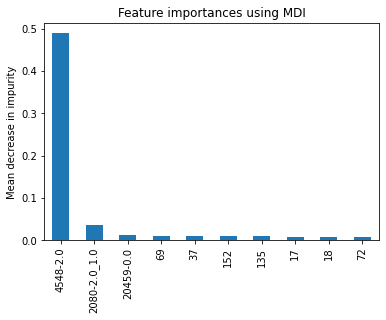

In [19]:
fig, ax = plt.subplots()
feat_sorted.iloc[:10].plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [20]:
feats10 = feat_sorted.iloc[:10].index
match_question(feats10)

[array(['Health satisfaction'], dtype=object),
 array(['Frequency of tiredness / lethargy in last 2 weeks'], dtype=object),
 array(['General happiness with own health'], dtype=object)]

#### visualising top feature

In [21]:
data_dir = '/well/tracey/shared/fps-ukb/bigflica_output/output_paincontrol_500/Result_IC200/'

In [22]:
def top_mods(data_dir, top_feat, mod_num=3, plot=True):
    """return top modalities given feature importance"""
    mod_contrib = np.load(os.path.join(data_dir, 'mod_contribution.npy')) # mod x feats
#     top_feat = int(feature_importance.index[0].split(' ')[1])
    print(f'top feature: {top_feat}')
    topIC = mod_contrib[:,top_feat]
    # load mod names
    mod_names = pd.read_csv('./sorted_feats.csv')
    plot_mod = mod_names.iloc[topIC.argsort()]
#     print(plot_mod.index.max())
    print('top modalities', plot_mod.iloc[-mod_num:])
    if plot:
        import matplotlib.pyplot as plt
        plt.subplots(figsize=(8,4))
        plt.bar(np.arange(len(topIC)), topIC[topIC.argsort()])
        plot_mod_names = plot_mod['modalities'].values
        plt.xticks(np.arange(len(plot_mod_names)), plot_mod_names, rotation=90)
    return top_feat, plot_mod.index[-mod_num:].values[::-1]

top feature: 69
top modalities       modalities
15   dr_stage2_0
32   dr_stage2_4
25   dr_stage2_1
16  dr_stage2_19
1   dr_stage2_17


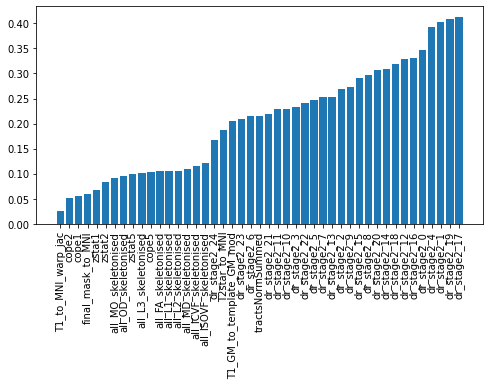

In [23]:
top_feat, mod_ls = top_mods(data_dir, top_feat=69, mod_num=5)

modality 1
(228453, 200)
modality 16
(228453, 200)
modality 25
(228453, 200)
modality 32
(228453, 200)
modality 15
(228453, 200)


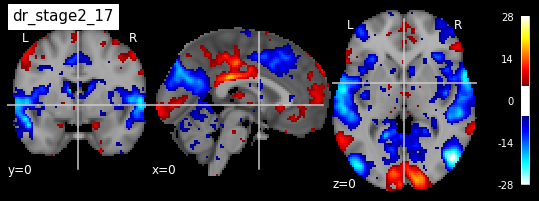

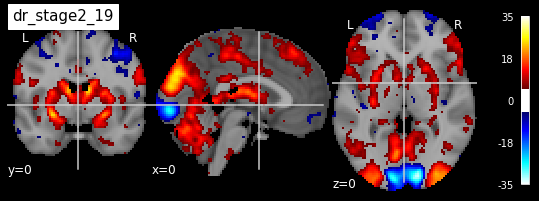

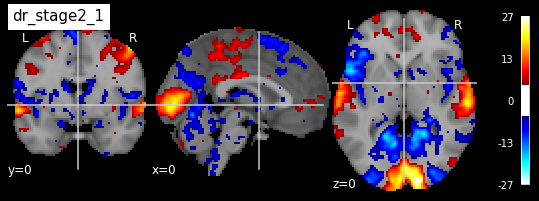

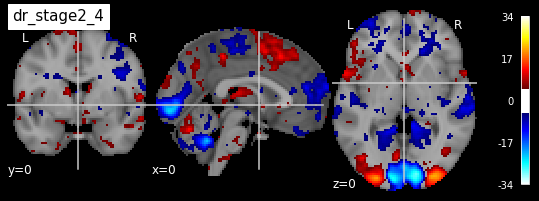

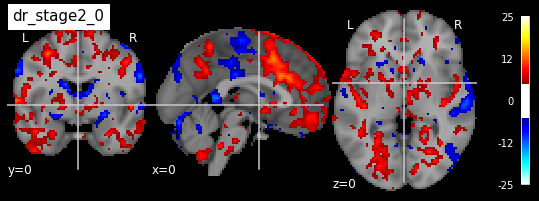

In [26]:
for mod in mod_ls:
    print(f'modality {mod}')
    reshape_z, mask_path = load_modZ(data_dir, modality_num=mod, feature_num=top_feat, plot_threshold=5)

#### use the other set 

In [27]:
bestIC = 30
qs_ls = ['cognitive', 'lifestyle', 'mental']
idp_ls = None

In [29]:
bp = fit_bp(bestIC=bestIC, qs_ls=qs_ls, idp_ls=idp_ls, feat_scaler=True, feat_balance=True, fit_n=10)

/gpfs3/well/seymour/users/uhu195/python/extract_npy/compare_paincontrol.py:64: DtypeWarning: Columns (863,867) have mixed types.Specify dtype option on import or set low_memory=False.
  df_bfl_qsidp = make_data_paincontrol(bestIC, qs_ls=qs_ls, idp_ls=idp_ls)
[I 2021-10-28 10:46:44,244] A new study created in memory with name: no-name-ceb86a25-a93c-40b3-ad8b-79a22cf0677f


df_qs_imputed_dum shape=(4558, 270)
df_bfl_qsidp shape=(4558, 302)
(4558, 299)
(3417, 299) (3417,)


[I 2021-10-28 10:46:48,908] Trial 0 finished with value: 0.6332986331502112 and parameters: {'max_depth': 2, 'n_estimators': 75, 'max_features': 0.21409882768022265, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_samples': 0.9639502810389797}. Best is trial 0 with value: 0.6332986331502112.
[I 2021-10-28 10:46:50,748] Trial 1 finished with value: 0.6382382794545733 and parameters: {'max_depth': 2, 'n_estimators': 125, 'max_features': 0.5555068523687441, 'min_samples_split': 13, 'min_samples_leaf': 13, 'max_samples': 0.7376802841912988}. Best is trial 1 with value: 0.6382382794545733.
[I 2021-10-28 10:46:59,679] Trial 2 finished with value: 0.6414755192715971 and parameters: {'max_depth': 13, 'n_estimators': 225, 'max_features': 0.5793415424340723, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_samples': 0.9340732710615782}. Best is trial 2 with value: 0.6414755192715971.
[I 2021-10-28 10:47:09,563] Trial 3 finished with value: 0.6391377027293221 and parameters: {'max_depth':

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**bp)

In [31]:
# load bfl
df_bfl_qsidp = make_data_paincontrol(bestIC=bestIC, qs_ls=qs_ls, idp_ls=idp_ls)
# retrain params
X_train, y_train, X_valid, y_valid = load_feats(df_bfl_qsidp, bestIC, test_size=0.25, dummies=False,
                              train=True, balance=True, scaler=True)

/gpfs3/well/seymour/users/uhu195/python/extract-py3.7.4-skylake/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (863,867) have mixed types.Specify dtype option on import or set low_memory=False.
  


df_qs_imputed_dum shape=(4558, 270)
df_bfl_qsidp shape=(4558, 302)
(4558, 299)


In [32]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, max_features=0.5793415424340723,
                       max_samples=0.9340732710615782, min_samples_leaf=9,
                       min_samples_split=14, n_estimators=225)

In [33]:
preds = clf.predict(X_train)
print(len(preds))
print(balanced_accuracy_score(y_train, preds))
print(sum(y_train==preds)/len(y_train))

3417
0.9125005310088621
0.9124963418203103


In [34]:
preds = clf.predict(X_valid)
print(len(preds))
print(balanced_accuracy_score(y_valid, preds))
print(sum(y_valid==preds)/len(y_valid))

1139
0.621624579903185
0.6215978928884986


In [35]:
roc_auc_score(y_valid, clf.predict_proba(X_valid)[:,1])

0.6707643449572965

In [36]:
output_ls = ['label', 'eid', 'bmrc']
tmp = df_bfl_qsidp.drop(columns=output_ls)
feature_names = tmp.columns

In [37]:
feat_importances = pd.Series(clf.feature_importances_, index=feature_names)

In [38]:
feat_sorted = feat_importances.sort_values(ascending=False)

Text(0, 0.5, 'Mean decrease in impurity')

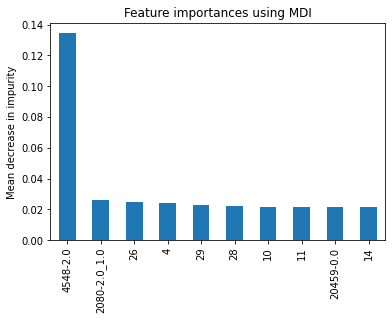

In [39]:
fig, ax = plt.subplots()
feat_sorted.iloc[:10].plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [40]:
feats10 = feat_sorted.iloc[:10].index
match_question(feats10)

[array(['Health satisfaction'], dtype=object),
 array(['Frequency of tiredness / lethargy in last 2 weeks'], dtype=object),
 array(['General happiness with own health'], dtype=object)]

In [41]:
data_dir = '/well/tracey/shared/fps-ukb/bigflica_output/output_paincontrol_500/Result_IC30/'

top feature: 26
top modalities    modalities
8      zstat1
34      cope2
40     zstat2
37      cope5
43     zstat5


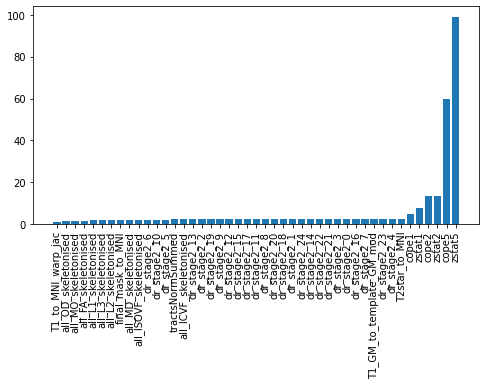

In [46]:
top_feat, mod_ls = top_mods(data_dir, top_feat=26, mod_num=5)

modality 43
(228453, 30)
modality 37
(228453, 30)
modality 40
(228453, 30)
modality 34
(228453, 30)
modality 8
(228453, 30)


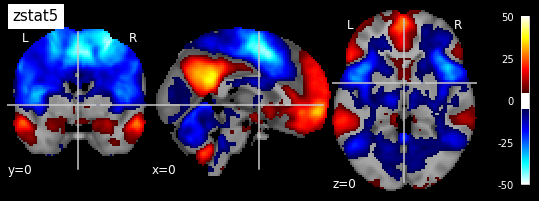

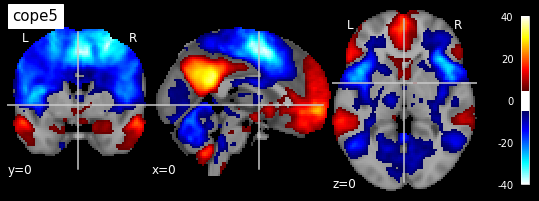

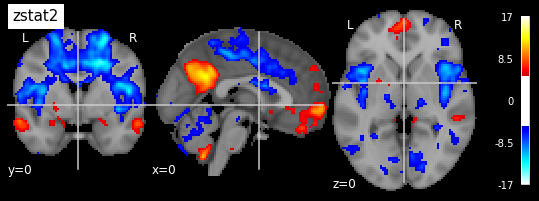

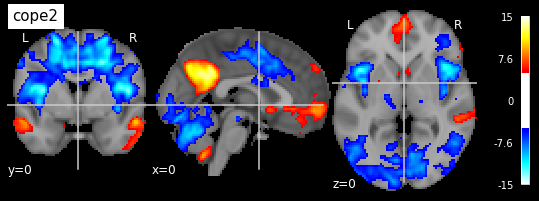

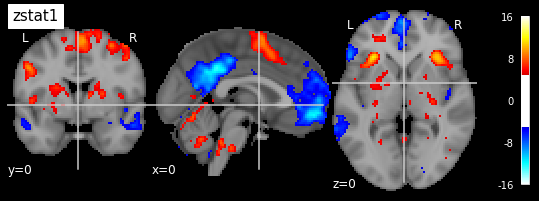

In [47]:
for mod in mod_ls:
    print(f'modality {mod}')
    reshape_z, mask_path = load_modZ(data_dir, modality_num=mod, feature_num=top_feat, plot_threshold=5)